In [2]:
from pylab import*
%matplotlib inline 

# $Problema 1$

Primeramente nos pide que calculemos las raices que tiene un función dada en cierto intervalo, para ello podemos meter en un ciclo alguna de las funciones que tenemos para calcular las raices como Newton o bipartición, en este caso tomare bipartición. Decidido esto comienza la escritura del codigo que solo hace es partir el intervalo en cachitos tales que le permita tener una convergencia a nuesto metodo de buscar raices.

In [5]:

def raiz_bip(func,x_i,x_d,err=1e-8):
    raiz = 0.5*(x_i+x_d)
    y_i,y_d = func(x_i),func(x_d)
   
    while abs(y_d)>=err:
        y_m = func(raiz)
        if y_m == 0.:
            
            break
        if y_m*y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i),func(x_d)
        
    return raiz

In [33]:
def busca_r_1(ec,t,dt=0.1):
    ti=arange(t[0]-dt,t[1]+dt,dt)
    raices=[]
    raices2=[]
    for i in range(len(ti)-1):
        s_l1= ec(ti[i])
        s_l2 = ec(ti[i+1])
        
        if s_l1 == 0:
            raices.append(ti[i])
        elif s_l2 == 0:
            raices.append(ti[i+1])

        elif (s_l1 * s_l2) <0:
            a=ti[i]
            b=ti[i+1]

            ra= raiz_bip(ec,a,b)
            raices.append(ra)
    for j in raices:
        if j not in raices2 :
            raices2.append(j)
    return raices2

In [ ]:
def busca_r_1(ec,t,dt=0.1):
    ti=arange(t[0]-dt,t[1]+dt,dt)
    raices=[]
    raices2=[]
    for i in ti:
        s_l1= ec(i)
        s_l2 = ec(i+1)
        
        if s_l1 == 0:
            raices.append(i)
        elif s_l2 == 0:
            raices.append(i+1)

        elif (s_l1 * s_l2) <0:
            a=i
            b=i+1

            ra= raiz_bip(ec,a,b)
            raices.append(ra)
    for j in raices:
        if j not in raices2 :
            raices2.append(j)
    return raices2

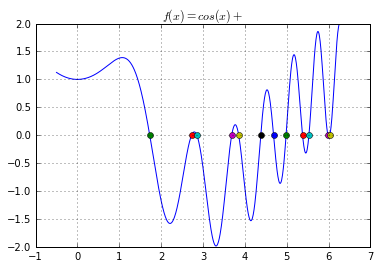

In [47]:
t=arange(-0.5,2*pi,.01)
y=ec(t)
plot(t,y)
plot(1.72764201760292080,0,"o")
plot( 2.7276420176029208, 0,"o")
plot(2.8534421503543865, 0,"o")
plot(3.6867361500859257, 0,"o")
plot(3.8534421503543865, 0,"o")
plot(4.3797484464943404,0,"o")
plot(4.6867361500859257,0, "o")
plot(4.9859028615057461,0, "o")
plot(5.3797484464943404,0,"o")
plot( 5.5314438968896855,0,"o")
plot( 5.9859028607606879,0, "o")
plot( 6.0315772071480751,0,"o")
grid(True)
title("$f(x)=cos(x)+\frac{6}{5}(sin(x^{2}$")
xlabel="X"
ylabel="Y(x)"
show()

In [41]:
def ec (x):
    y=cos(x) + (6/5)*(sin(x*x))
    return y

In [37]:

prueba =busca_r_1(ec,[0,2*pi])


In [38]:
print prueba

[1.7276420176029208, 2.7276420176029208, 2.8534421503543865, 3.6867361500859257, 3.8534421503543865, 4.3797484464943404, 4.6867361500859257, 4.9859028615057461, 5.3797484464943404, 5.5314438968896855, 5.9859028607606879, 6.0315772071480751]


# $Problema2$

Para encontrar los valores de las raices para cada x y t dados entonces modificare un poco el metodo anterior para encontrar las raices de la fucnción que depende de x y y.

In [70]:
def busca_r_m(ec,x_in,y_in,dt=0.1):
    x = arange(x_in[0]-dt,x_in[1]+dt,dt)
    y = arange(y_in[0]-dt,y_in[1]+dt,dt)
    raices = [[],[]]#definimos un arreglode 2 listas donde guardaremos las coordenadas del movimoento
    for i in range(len(y)-1):
        for j in range(len(x-1)):
            f1 = ec(x[j],y[i])
            f2 = ec(x[j],y[i+1])                                                
            if f1 == 0:
                raices[0].append(x[j]),raices[1].append(y[i])
            elif f2 == 0:
                raices[0].append(x[j]),raices[1].append(y[i+2])
            elif f1*f2 < 0:
                raices[0].append(x[j]),raices[1].append(raiz_bip(func,[x[j],y[i]]))
                
    return raices

In [65]:
def ec2(x,t):
    return 6*x*(x**2 + y**2)*exp(-x**2 - y**2) + 2*(exp(-(y + 2)**2) + exp(-(y - 2)**2))*exp(-(x + 1)**2) - 1


Obteniendo las raices se tiene:


In [75]:

raices = busca_r_m(ec2,[-4,4],[-4,4],0.02)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
plot(raices[0],raices[1],"o")
xlabel("$x$")
ylabel("$y$")
title("Raices de $f(x,y)$")
show()

NameError: name 'raices' is not defined

El chiste de esya modificación en el codigo anterior es para obter las raices y poder graficar las en un plao xy, solo hay un error de indices de las listas que cree por lo que no pudo corres del todo.

# $Problema 3$

Lo mando como otro notebook